# Portofolio: Funnel Analysis - Improving Ad Relevance, CPM, and Direct Message Effectiveness

# Business Understanding

## Introduction

The Team marketing has conducted a marketing strategy using discount 99% for first month after sign up in fitness center to attract new customers. This customer acquisition strategy used the top five popular social media platform. Our main goal for this analysis is to know how much the cost per acquisition using funnel analysis. Few things we need to know:
- The CPM: IDR65.000
- Impression: 990.000

In [1]:
cpm = 65000

## Objectives

There are metrics and KPI we need to calculate, like:
- Impression per click
- Total user reach
- Impression per user
- User per click
- Click per message
- Message per visit
- Visit per closing
- cost per acquisition

## Tools and Dataset Needed

The tools need for this analysis is Python Interpreter, Python library(numpy, pandas, matplotlib, seaborn), JupyterLab. We use the fitness acquisition csv dataset for this analysis. This dataset has four variables and those are id, platform, date, and action during the date.

## Methodology

We will use AIDA concept for this analysis with some modification to fit the problem. It's AIDCA (Awareness, Interest, Desire, Conviction, and Action). In this dataset, the action variables follow this term:
- Awareness = Impression
- Interest = Click
- Desire = Message(DM)
- Conviction = Visit
- Action = Closing

```
impression per click = total impression / total click

impression per user = total impression / total user

user per click = total user / total click

click per message = total click / total direct message

message per visit = total direct message / total visit store

visit per close = total users visit store / total close
where close means purchase or subscribe

cost per acquisition = (cost per mile / 1000) * impression / total close
```

# Data Understanding

## Data Acquisition

In [2]:
# load library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataset = pd.read_csv('data/fitness_acquisition.csv')

In [4]:
print(dataset.head())

        id   platform        date      action
0  1000001  instagram  2024-01-03  impression
1  1000004   facebook  2024-01-01  impression
2  1000006   linkedin  2024-01-04  impression
3  1000007  instagram  2024-01-04  impression
4  1000008   facebook  2024-01-01  impression


## Data Profiling

In [5]:
# dataset info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059786 entries, 0 to 1059785
Data columns (total 4 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   id        1059786 non-null  int64 
 1   platform  1059786 non-null  object
 2   date      1059786 non-null  object
 3   action    1059786 non-null  object
dtypes: int64(1), object(3)
memory usage: 32.3+ MB


In [6]:
# missing values
dataset.isna().sum()

id          0
platform    0
date        0
action      0
dtype: int64

In [7]:
# duplicated values
dataset.duplicated().sum()

np.int64(679203)

This problem maybe happens because some records happen twice or more.

In [8]:
# correct wrong format
dataset['date'] = pd.to_datetime(dataset['date'])

In [9]:
dataset['id'] = dataset['id'].astype(int).astype(str)

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059786 entries, 0 to 1059785
Data columns (total 4 columns):
 #   Column    Non-Null Count    Dtype         
---  ------    --------------    -----         
 0   id        1059786 non-null  object        
 1   platform  1059786 non-null  object        
 2   date      1059786 non-null  datetime64[ns]
 3   action    1059786 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 32.3+ MB


## Descriptive Statistics

In [11]:
print(dataset.describe(include='all'))

             id  platform                           date      action
count   1059786   1059786                        1059786     1059786
unique    90000         5                            NaN           5
top     1075685  facebook                            NaN  impression
freq         38    381834                            NaN      990000
mean        NaN       NaN  2024-01-02 12:52:52.661649408         NaN
min         NaN       NaN            2024-01-01 00:00:00         NaN
25%         NaN       NaN            2024-01-02 00:00:00         NaN
50%         NaN       NaN            2024-01-03 00:00:00         NaN
75%         NaN       NaN            2024-01-04 00:00:00         NaN
max         NaN       NaN            2024-01-12 00:00:00         NaN


In [12]:
dataset['id'].value_counts()

id
1075685    38
1023730    37
1099075    37
1057861    37
1040609    36
           ..
1023677     1
1023674     1
1000077     1
1048965     1
1099943     1
Name: count, Length: 90000, dtype: int64

In [13]:
dataset['platform'].value_counts()

platform
facebook     381834
instagram    255000
linkedin     185359
tiktok       172411
youtube       65182
Name: count, dtype: int64

In [14]:
dataset['date'].value_counts().sort_index()

date
2024-01-01    260299
2024-01-02    263376
2024-01-03    264100
2024-01-04    264436
2024-01-05      3131
2024-01-06       641
2024-01-07      1066
2024-01-08      1099
2024-01-09       988
2024-01-10       520
2024-01-11       121
2024-01-12         9
Name: count, dtype: int64

We can see that the platform advertises on the first four days.

In [15]:
dataset['action'].value_counts()

action
impression    990000
click          40950
message        22860
visit           4500
close           1476
Name: count, dtype: int64

# Data Preprocessing

In [16]:
def ratio(x,y):
    """
    x per y
    """
    result = x/y 
    return result

In [17]:
def pie(a, b, a_label, b_label, caption):
    plt.pie(
        x=[(a-b), 
           b], 
        autopct='%1.1f%%', 
        labels=[a_label,
                b_label])
    plt.text(x=1, y=-1, s=f"{caption}: {int(a)}")
    plt.text(x=1, y=-1.1, s=f"{a_label}: {int(a-b)}")
    plt.text(x=1, y=-1.2, s=f"{b_label}: {int(b)}")

    plt.show()

In [18]:
pivot_table = dataset.pivot_table(
    columns='action',
    index='id', 
    values='date', 
    aggfunc='count')[['impression',
                    'click',
                    'message',
                    'visit',
                    'close']]

In [19]:
print(pivot_table.head())

action   impression  click  message  visit  close
id                                               
1000001         5.0    1.0      NaN    NaN    NaN
1000004        24.0    1.0      1.0    NaN    NaN
1000006         6.0    NaN      NaN    NaN    NaN
1000007        19.0    NaN      NaN    NaN    NaN
1000008        12.0    1.0      1.0    1.0    1.0


In [20]:
impression = pivot_table['impression'].sum()
user = len(pivot_table.index)
click = pivot_table['click'].sum()
message = pivot_table['message'].sum()
visit = pivot_table['visit'].sum()
close = pivot_table['close'].sum()

# Modeling

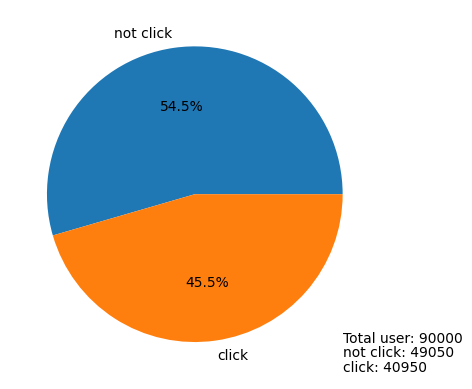

In [21]:
pie(user, click, a_label='not click', b_label='click', caption='Total user')

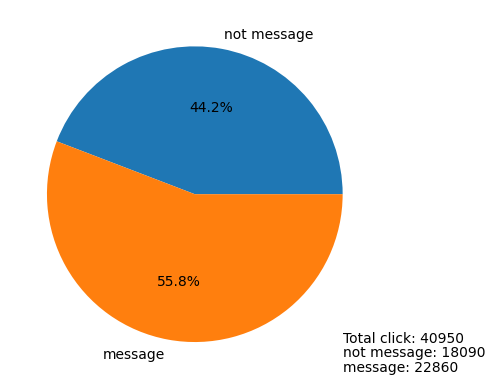

In [22]:
pie(click, message, a_label='not message', b_label='message', caption='Total click')

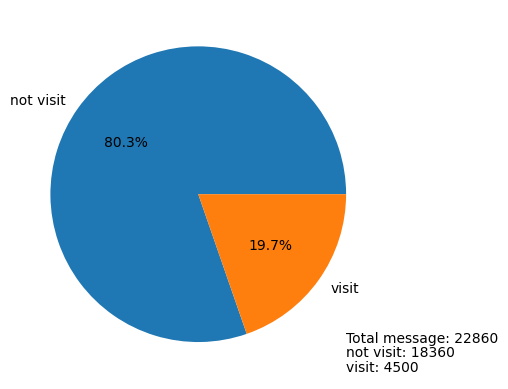

In [23]:
pie(message, visit, 'not visit', 'visit', 'Total message')

From 22860 direct message, only 19.7% potential customers decide to visit. We can improve the marketing strategy around this area.

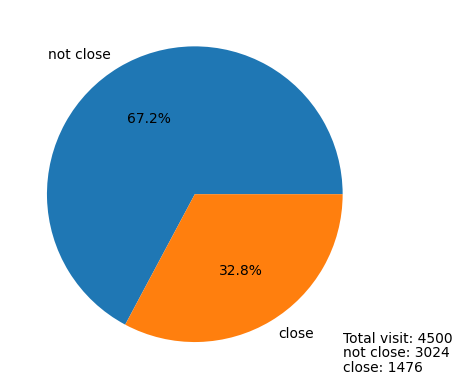

In [24]:
pie(visit, close, 'not close', 'close', 'Total visit')

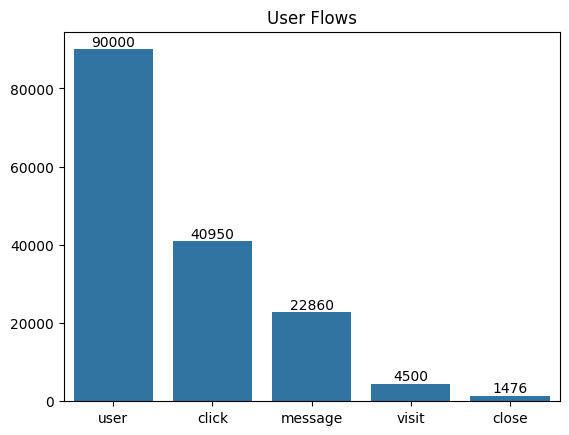

In [25]:
value = [user, click, message, visit, close]
label = ['user', 'click', 'message', 'visit', 'close']

figure = sns.barplot(x=label, y=value)
figure.bar_label(figure.containers[0])
plt.title('User Flows')
plt.show()

In [26]:
print(f"We have {impression} impressions.")
print(f"Users see the ads about {ratio(impression, user).round(2)} times to click the ads (if interested).")
print(f"The total user reach is {user} users.")
print(f"To get one click, we need to have more less {ratio(impression, click).round(2)} impressions.")
print(f"We need to have more less {ratio(user, click).round(2)} users to get one click.")
print(f"To get one direct message, we need to have more less {ratio(click, message).round(2)} clicks.")
print(f"To get one visitor, we need to have more less {ratio(message, visit).round(2)} direct messages.")
print(f"To get one registration for trial fitness, we need to have more less {ratio(visit, close).round(2)} visitors.")

We have 990000.0 impressions.
Users see the ads about 11.0 times to click the ads (if interested).
The total user reach is 90000 users.
To get one click, we need to have more less 24.18 impressions.
We need to have more less 2.2 users to get one click.
To get one direct message, we need to have more less 1.79 clicks.
To get one visitor, we need to have more less 5.08 direct messages.
To get one registration for trial fitness, we need to have more less 3.05 visitors.


CPM or cost per mile means the cost for every 1000 impressions and it cost IDR65.000 perform one CPM campaign. We have 990000 impressions. We need to divide 65000 by 1000 to get the price for one impression.

In [27]:
price_per_impression = 65000/1000

In [28]:
cost = impression * price_per_impression

In [29]:
cost_per_acquisition = cost / close

In [30]:
print(f"The price for one impression: {price_per_impression} IDR.")
print(f"The total cost for the campign: {cost} IDR.")
print(f"The cost to acquire one customer registration: {cost_per_acquisition.round()} IDR.")

The price for one impression: 65.0 IDR.
The total cost for the campign: 64350000.0 IDR.
The cost to acquire one customer registration: 43598.0 IDR.


# Insights

## Interpretation and Reporting

- It needs 11 impression for one click. This means the ad maybe not enough interesting or relevant for the targeted audience.
- The cost per acquisition is IDR43.598. We need to see from many perspectives. If the CPA is still lower than the margin profit, it is still profitable. If the CPA is higher than the margin profit but the customer lifetime value can cover the CPA, it is still profitable. If not, this shows that you need to optimize the campign to decrease the acquisition cost.
- There are 19.7% visitors from after they direct message through social media. There are big potential to improve the interaction to customers using direct message.
- From 4500 visitors, 32.8% of them decide to register for trial in the fitness center. This is ok situation but still there are space for improvement.

## Action

- Improve ad relevance:
  - Research more about the audience to understand their interest and needs.
  - Test various types of ad to see which one is more effective.
  - Make more relevant and interested ads for our targeted audience.

- Optimize cost per mile (CPM):
  - Review the marketing strategy to get lower cost per mile.
  - Use more specific and relevant keywords for targeting right audience.
  - Retargeting our audience (If needed).

- Develop direct message:
  - Personalized direct message based on their personal information.
  - Give interesting and relevant offer to our potential customers in direct message.
  - Use clear and persuasive language to boost conversion.

# Further Analysis

- Survival analysis to understand the customer lifetime value.
- A/B testing to test various elements in the campign to see which element is more effective.
- Classification analysis to predict what kind of customers will click the ads or not.